<div style="background-color:lightblue; padding:10px;">
<span style="color:blue;font-family: Verdana;"><center><h1>Predicting Coupon Acceptance on E-commerce Platforms</h1></center></span>
</div>



## <u><span style="color:red;">Problem Statement:</span></u>
<span style="font-family: 'Verdana';"><i><h4>The current coupon distribution strategy of the e-commerce platform is suboptimal, leading to lower user engagement and inefficient use of marketing resources. There is a need to accurately predict whether users will accept coupons during their driving journeys, considering various driving scenarios and user attributes.</h4></i></span>
## <u><span style="color:#6F4E37;">Objective:</span></u>
<span style="font-family: 'Verdana';"><i><h4>To develop a machine learning model that predicts user acceptance of coupons based on driving scenarios and user attributes. By doing so, the project aims to optimize coupon distribution strategies, enhance user engagement, and improve the overall effectiveness of the platform's marketing efforts.</h4></i></span>
## <u><span style="color:#000080;">Data Structure:</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';">
<b>Number of Columns:</b> 25<br>
<b>Number of Rows:</b>12684<br>
<b>Target Feature:</b>Accept(Y/N?)<br>

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;"> 
<center>Loading Necessary Libraries</center>
</div>

In [4]:
# data analysis, visualization
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# preprocessing tools and models from scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xgb

# metrics for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;"> 
    <center>Data Structure Loading and Inspection</center>
</div>

In [6]:
df = pd.read_csv('Ds_Data.csv')
df.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CoffeeHouse  \
0         1d  Female  21  Unmarried partner             1  ...       never   
1         2h  Female  21  Unmarried partner             1  ...       never   
2         2h  Female  21  Unmarried partner             1  ...       never   
3         2h  Female  21  Unmarried partner             1  ...       never   
4         1d  Female  21  Unmarried partner             1  ...       never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       NaN                  4~8              1~3                1   
1       NaN                  4~8              1~3                1   
2       NaN                  4~8              1~3                1   
3       NaN                  4~8              1~3                1   
4       NaN                  4~8              1~3                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  \
0                 0                 0              0             1   
1                 0                 0              0             1   
2                 1                 0              0             1   
3                 1                 0              0             1   
4                 1                 0              0             1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 25 columns]

In [7]:
df.shape

(12684, 25)

#### <span style="font-family: 'Verdana';"> Basic Summary of the Dataset</span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

##### <span style="font-family: 'Verdana';"><u> Summary insights</u></span>
<span style="font-family: 'Verdana';">
While reviewing the dataset summary, I observed that several input features contain null values, including car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50. <br>
Additionally, the age, income, and expiration features are currently in object format and need to be checked and converted.
</span>

#### <span style="font-family: 'Verdana';"> Numerical Features Statistics </span>

In [12]:
df.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp  Accept(Y/N?)  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

##### <span style="font-family: 'Verdana';"><u> Numerical features description insights</u></span>
<span style="font-family: 'Verdana';">
    
* teperature:<br>
    max values is 80F, temperature range is not extreme, so it might not have a strong impact on coupon<br>
* has_children:<br>
    Most travelers don't have children travelers might be single, individual or couples. Need to check children impact the coupon<br>
* direction_same:<br>
    most of the restaurant/cafe/bar are not in the same direction<br>
* direction_opp<br>
    50% restaurant/cafe/bar are not in the opposite dirrection<br>
target is accept(y/n) and fairly  balanced
</span>

#### <span style="font-family: 'Verdana';">Categorical features Statistics</span>

In [15]:
df.describe(include="object")

destination passanger weather        coupon expiration  gender  \
count             12684     12684   12684         12684      12684   12684   
unique                3         4       3             5          2       2   
top     No Urgent Place     Alone   Sunny  Coffee House         1d  Female   
freq               6283      7305   10069          3996       7091    6511   

          age    maritalStatus                 education  occupation  \
count   12684            12684                     12684       12684   
unique      8                5                         6          25   
top        21  Married partner  Some college - no degree  Unemployed   
freq     2653             5100                      4351        1870   

                 income                     car    Bar CoffeeHouse CarryAway  \
count             12684                     108  12577       12467     12533   
unique                9                       5      5           5         5   
top     $25000 - $37499  Scooter and motorcycle  never       less1       1~3   
freq               2013                      22   5197        3385      4672   

       RestaurantLessThan20 Restaurant20To50  
count                 12554            12495  
unique                    5                5  
top                     1~3            less1  
freq                   5376             6077

##### <span style="font-family: 'Verdana';"><u> Categorical features description insights</u></span>
<span style="font-family: 'Verdana';">

destination:
Most traveler are not hurry, which could make them more likely to accept the coupon.
Need to check higher coupon acceptance is there for this category


passanger:
most users travel alone, so decision on coupon usage is independent.
needed to check if passenger type impacts coupon acceptance


weather:
most data is sunny weather condition, need to check the coupon acceptance changes on other categoris.


coupon:
Suggests that coffee-related coupons are the most commonly offered or accepted.


expiration:
Most coupons have 1-day validity
Need to check if shorter validity (1 hour) leads to higher acceptance.


gender:
More Female Users, Fairly balanced dataset, but need to check if gender affects coupon acceptance rates.


age:
Young adults (21-26) seem to be the most common users.
Younger people may be more likely to accept coupons due to price sensitivity.


Marital Status
Top category: "Married partner"


Education
Top category: "Some college - no degree" (4351 occurrences, ~34%)
Majority have some college education.
Could impact coupon acceptance based on financial awareness.


Occupation
Top category: "Unemployed" (1870 occurrences, ~15%)
Might suggest a higher coupon acceptance rate due to financial constraints.
Need to analyze if employment status impacts acceptance.


Income
Top income range: "$37500 - $49999" (2013 occurrences)
Middle-income users dominate.
Higher-income users might not be as price-sensitive to coupons.


Car Ownership
Only 108 non-null values 
</span>

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Data Cleaning</center>
</div>

#### <span style="font-family: 'Verdana';">Handling Null Values</span>

In [19]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [20]:
null_columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in null_columns:
    print(df[i].value_counts())
    print("_"*20)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
____________________
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
____________________
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
____________________
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
____________________
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64
____________________


In [21]:
df.fillna({'Bar':df['Bar'].mode()[0],
          'CoffeeHouse':df['CoffeeHouse'].mode()[0],
           'CarryAway':df['CarryAway'].mode()[0],
           'RestaurantLessThan20':df['RestaurantLessThan20'].mode()[0],
           'Restaurant20To50':df['Restaurant20To50'].mode()[0],
          'car':'unknown'},inplace=True)

In [22]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [23]:
df['car'].value_counts()

car
unknown                                     12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [24]:
df_copy1 = df.copy()

In [25]:
df_copy1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [26]:
df_copy1.shape

(12684, 25)

#### <span style="font-family: 'Verdana';">Handling Duplicated Records</span>

In [28]:
df_copy1.duplicated().sum()

291

In [29]:
df_copy1.drop_duplicates(inplace=True)

In [30]:
df_copy1.duplicated().sum()

0

#### <span style="font-family: 'Verdana';">Mapping inconsistent features</span>

In [32]:
df_copy1['expiration'].value_counts()

expiration
1d    6938
2h    5455
Name: count, dtype: int64

In [33]:
# expiration feature have only two values, so I mapped into  numeriic format
df_copy1['expiration'] = df['expiration'].map({'2h': 2, '1d': 24})

In [34]:
df_copy1['age'].value_counts()

age
21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: count, dtype: int64

In [35]:
age_mapping ={
    '21':21,
    '26':26,
    '31':31,
    '50plus':55,
    '36':36,
    '41':41,
    '46':46,
    'below21':18
}
df_copy1['age']=df_copy1['age'].map(age_mapping)

In [36]:
df_copy1['age'].dtype

dtype('int64')

In [37]:
df_copy1['income'].value_counts()

income
$25000 - $37499     1972
$12500 - $24999     1795
$37500 - $49999     1760
$100000 or More     1688
$50000 - $62499     1624
Less than $12500    1013
$87500 - $99999      865
$75000 - $87499      844
$62500 - $74999      832
Name: count, dtype: int64

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>EXPLORATORY DATA ANALYSIS</center>
</div>

#### <span style="font-family: 'Verdana';">Fetching Numerical and Categorical Features</span>

In [40]:
numerical_cols = df_copy1.select_dtypes(include=['int','float']).columns
categorical_cols = df_copy1.select_dtypes(include=['object']).columns
print(numerical_cols)
print("*"*20)
print(categorical_cols)

Index(['temperature', 'expiration', 'age', 'has_children', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')
********************
Index(['destination', 'passanger', 'weather', 'coupon', 'gender',
       'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')


#### <span style="font-family: 'Verdana';">Fetching Discrete,Continues,Cattegorical and Non categorical Features</span>

In [42]:
discrete_features = [col for col in numerical_cols if df_copy1[col].nunique() <10]
continuous_feature = [col for col in numerical_cols if df_copy1[col].nunique() >=10]
categorical_feature = [col for col in categorical_cols if df_copy1[col].nunique() <10]
non_categorical_feature = [col for col in categorical_cols if df_copy1[col].nunique() >=10]
print(discrete_features)
print("_"*30)
print(continuous_feature)
print("_"*30)
print(categorical_feature)
print("_"*30)
print(non_categorical_feature)
print("_"*30)

['temperature', 'expiration', 'age', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)']
______________________________
[]
______________________________
['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'education', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
______________________________
['occupation']
______________________________


#### <span style="font-family: 'Verdana';">Unique Value Count of Discrete Features values</span>

In [44]:
for i in discrete_features:
    print(df_copy1[i].value_counts())
    print("~"*30)

temperature
80    6328
55    3828
30    2237
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
expiration
24    6938
2     5455
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
age
21    2598
26    2486
31    1984
55    1756
36    1293
41    1079
46     660
18     537
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
has_children
0    7243
1    5150
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
toCoupon_GEQ5min
1    12393
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
toCoupon_GEQ15min
1    6985
0    5408
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
toCoupon_GEQ25min
0    10930
1     1463
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
direction_same
0    9744
1    2649
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
direction_opp
1    9744
0    2649
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accept(Y/N?)
1    7012
0    5381
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#### <span style="font-family: 'Verdana';">Visualization of Univariate Analysis of Discrete Features</span>

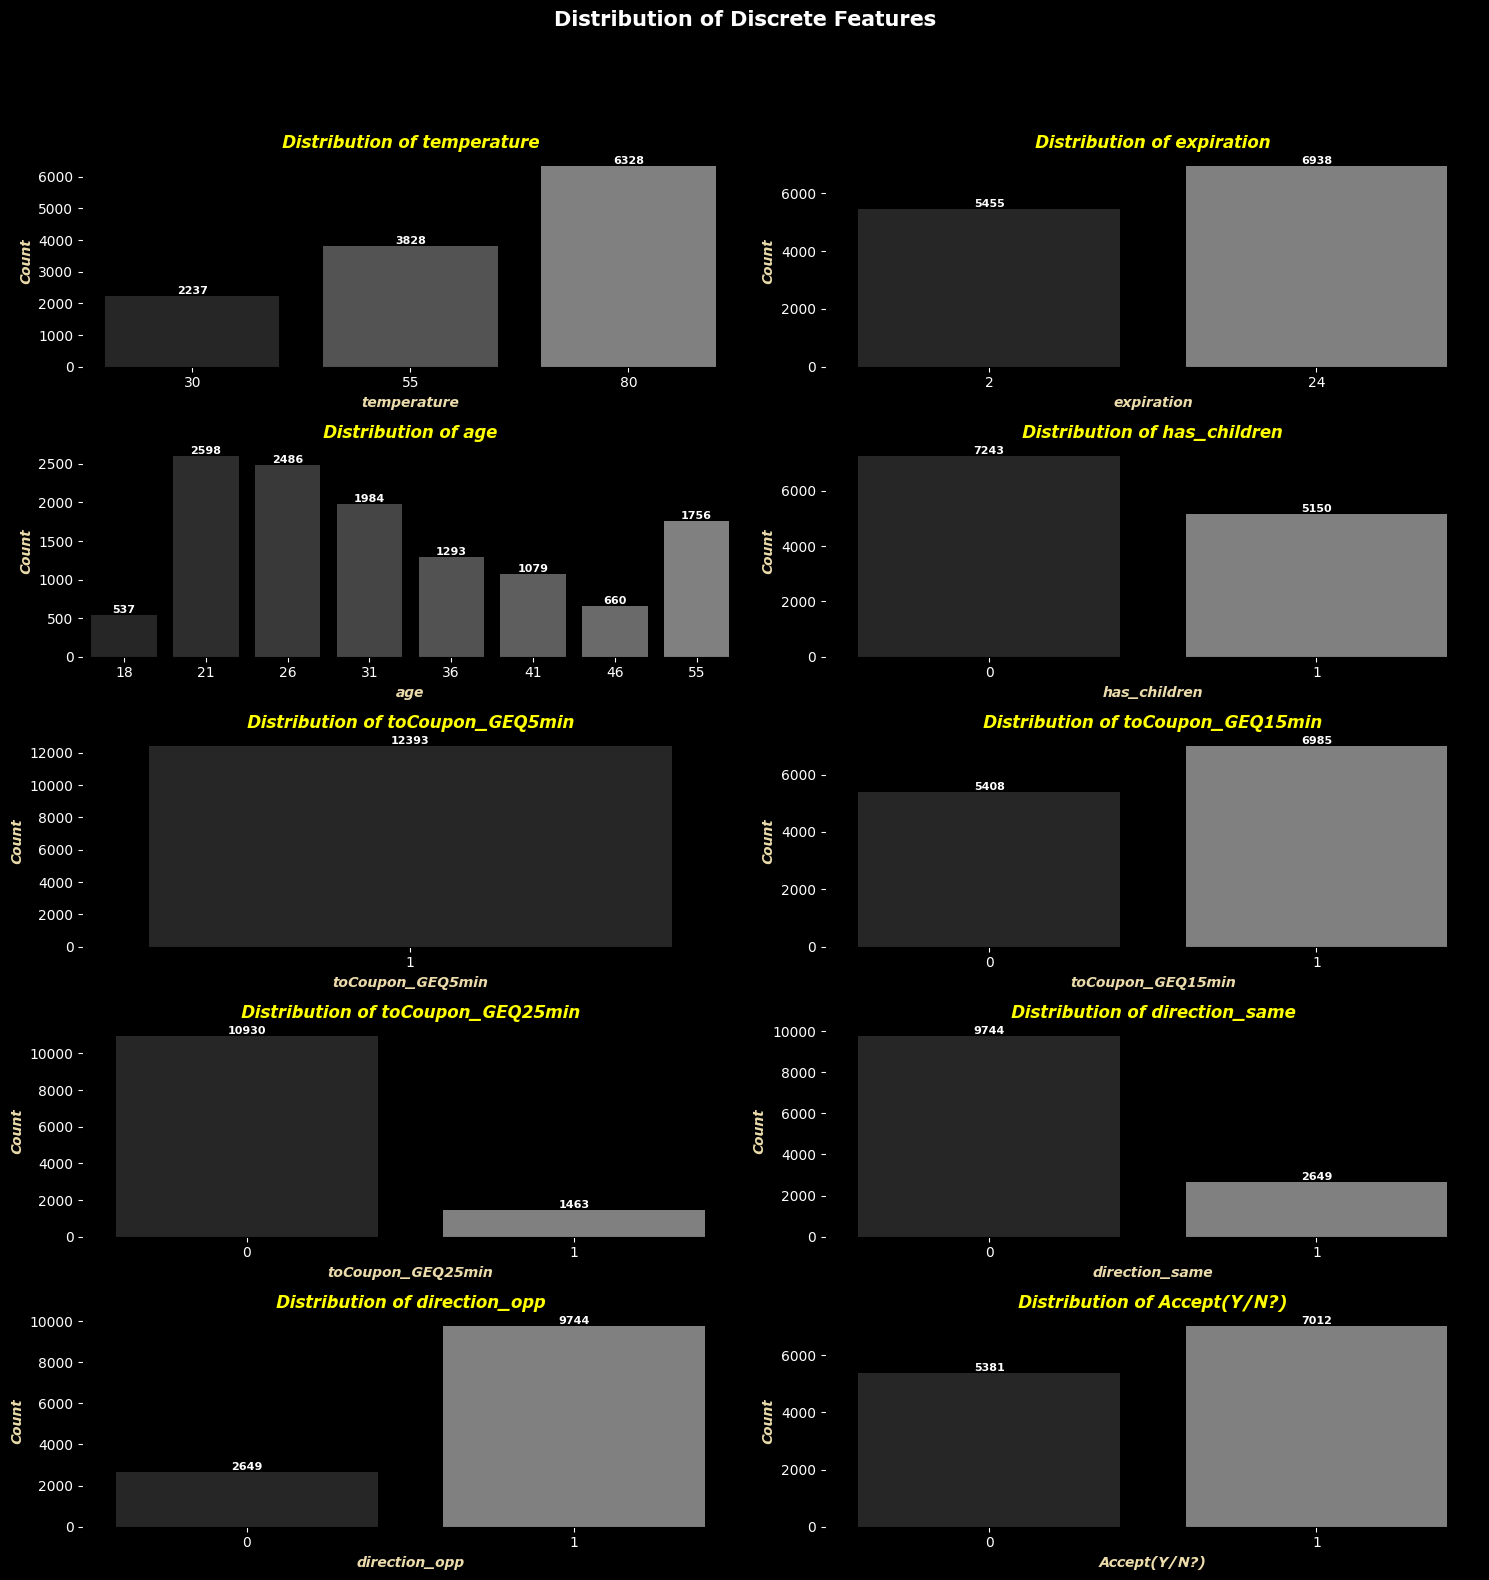

In [46]:
fig,ax = plt.subplots(5,2,figsize=(15,15))
ax = ax.flatten()
fig.patch.set_facecolor('black')
fig.suptitle('Distribution of Discrete Features', 
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(discrete_features):
    row = i // 2
    col_idx = i % 2
    sns.countplot(data=df_copy1,x=col,ax=ax[i],color='gray',hue=col)
    ax[i].set_title(f"Distribution of {col}",color='yellow',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_xlabel(col,color='#ECDCAB',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_ylabel("Count",color='#ECDCAB',fontname='Verdana',weight='bold',style='italic')
    ax[i].tick_params(colors='white')
    ax[i].set_facecolor('black')
    ax[i].legend([], [], frameon=False)
    for j in ax[i].containers:
        ax[i].bar_label(j,fmt='%d',label_type='edge',color='white',fontsize=8,weight='bold')
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Verdana';">Unique Value Count of Categorical Features values</span>

In [48]:
for i in categorical_feature:
    print(df_copy1[i].value_counts())
    print('^'*30)

destination
No Urgent Place    6118
Home               3161
Work               3114
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
passanger
Alone        7178
Friend(s)    3166
Partner      1068
Kid(s)        981
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
weather
Sunny    9862
Snowy    1329
Rainy    1202
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
coupon
Coffee House             3913
Restaurant(<20)          2708
Carry out & Take away    2275
Bar                      2010
Restaurant(20-50)        1487
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
gender
Female    6355
Male      6038
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
maritalStatus
Married partner      4994
Single               4610
Unmarried partner    2155
Divorced              505
Widowed               129
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
education
Some college - no degree                  4260
Bachelors degree                          4247


In [49]:
categorical_feature

['destination',
 'passanger',
 'weather',
 'coupon',
 'gender',
 'maritalStatus',
 'education',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

#### <span style="font-family: 'Verdana';">Visualization of Univariate Analysis of Categorical Features</span>

In [51]:
demogratic_info = ['gender','maritalStatus','education','income']
travel_info = ['destination','passanger','car']
other_info = ['weather','coupon','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

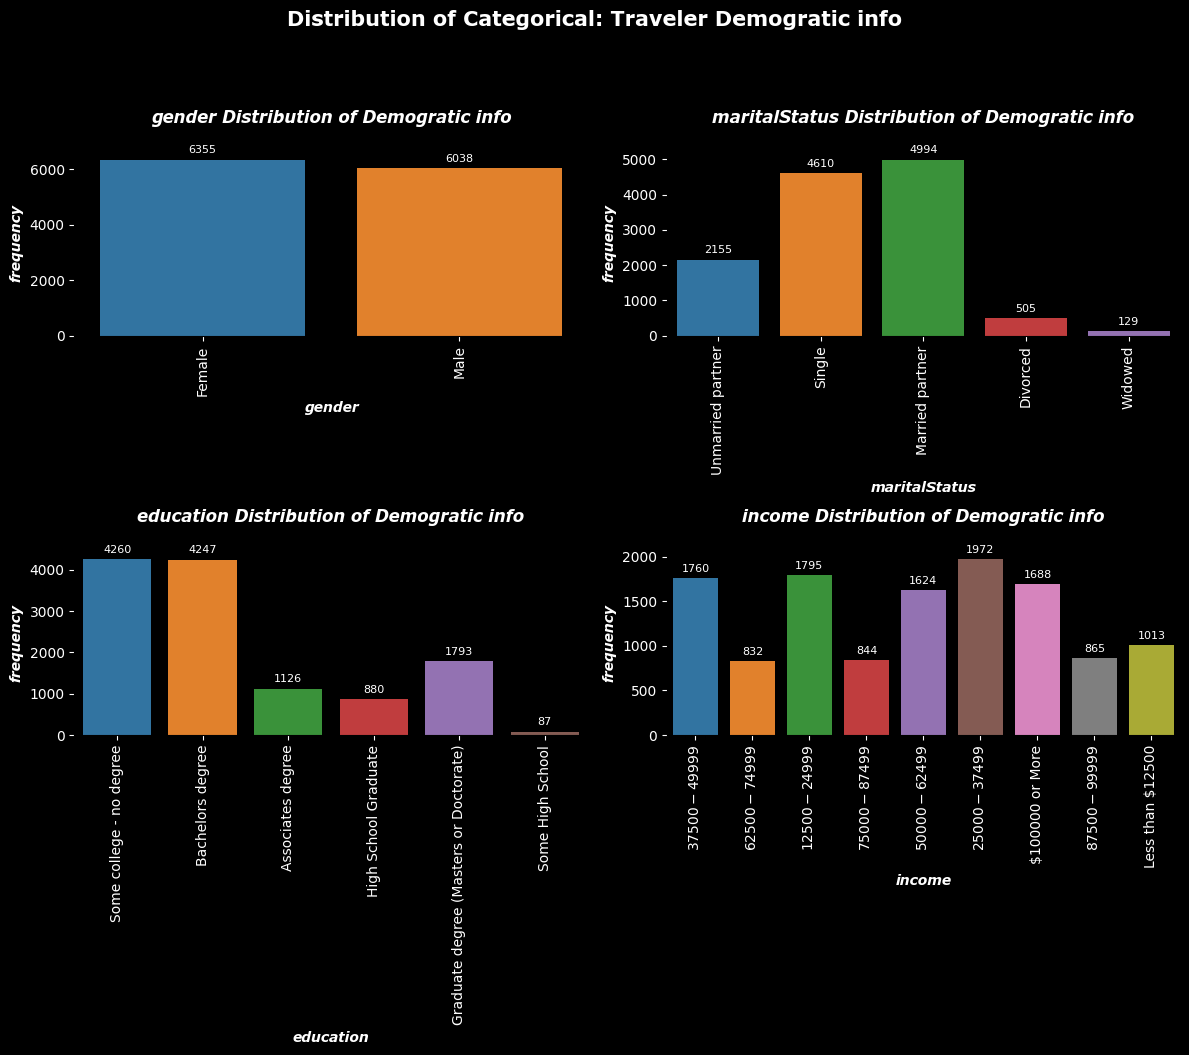

In [52]:
fg,ax = plt.subplots(2,2,figsize=(12,10))
ax = ax.flatten()
fg.patch.set_facecolor('black')
fg.suptitle('Distribution of Categorical: Traveler Demogratic info', 
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(demogratic_info):
    sns.countplot(data=df_copy1,x=col,hue=col,ax=ax[i])
    ax[i].set_title(f"{col} Distribution of Demogratic info",color='white',fontname='Verdana',weight='bold',style='italic',pad=20)
    ax[i].set_xlabel(col,color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_ylabel("frequency",color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].tick_params(colors='white')
    ax[i].set_facecolor('black')
    for j in ax[i].containers:
        ax[i].bar_label(j,fmt='%d',label_type='edge',color='white',fontsize=8,padding=3)
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].legend([], [], frameon=False)
if len(demogratic_info) < len(ax):
    fg.delaxes(ax[len(demogratic_info)])
plt.tight_layout()
plt.show()

In [53]:
travel_info

['destination', 'passanger', 'car']

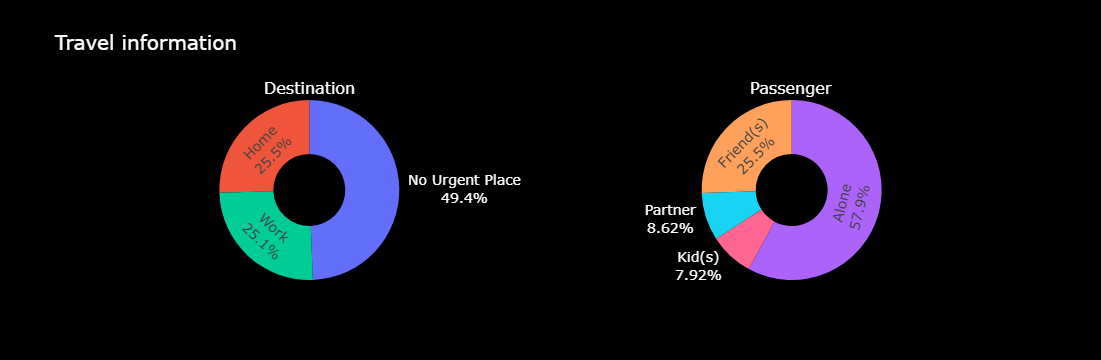

In [54]:
destination_count = df_copy1['destination'].value_counts()
passanger_count = df_copy1['passanger'].value_counts()

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'pie'}, {'type':'pie'}]],
                   subplot_titles=["Destination", "Passenger"])
fig.add_trace(go.Pie(labels=destination_count.index, values=destination_count.values,textinfo='label+percent',
               hoverinfo='label+percent+value'),
              row=1, col=1)
fig.add_trace(go.Pie(labels=passanger_count.index, values=passanger_count.values,textinfo='label+percent',
               hoverinfo='label+percent+value'),
              row=1, col=2)

fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Travel information",
    showlegend=False,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(family="Verdana", size=14, color="white"))
fig.show()


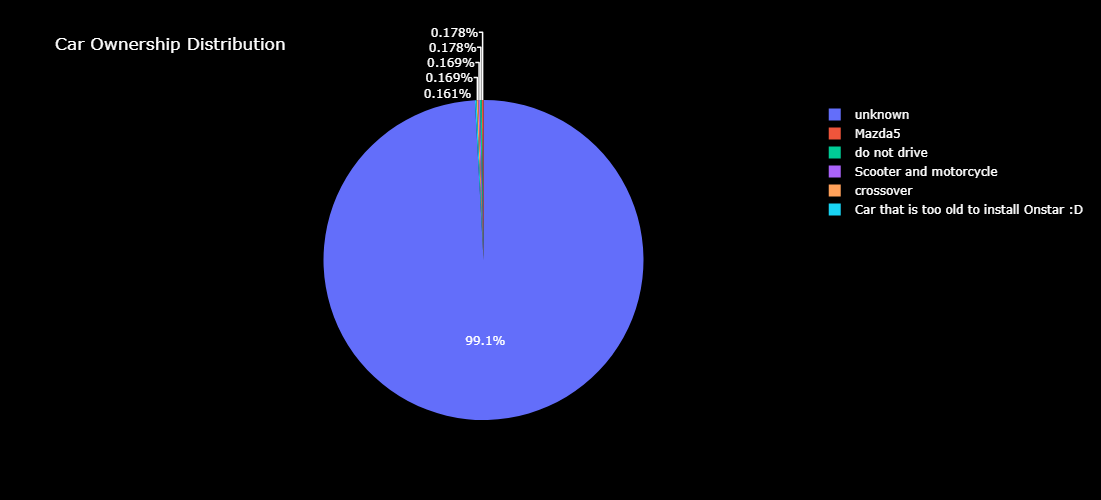

In [55]:
car_count = df_copy1['car'].value_counts()
fig = px.pie(car_count, names=car_count.index, values=car_count.values, title='Car Ownership Distribution')

# Adjust figure background and size
fig.update_layout(
    paper_bgcolor='black',  # Set the background to black
    plot_bgcolor='black',   # Set the plot area background to black
    title_font_color='white',  # Title text color
    font_color='white',        # Other text color
    width=1200,                 # Adjust width of the figure
    height=500                 # Adjust height of the figure
)

In [56]:
other_info

['weather',
 'coupon',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

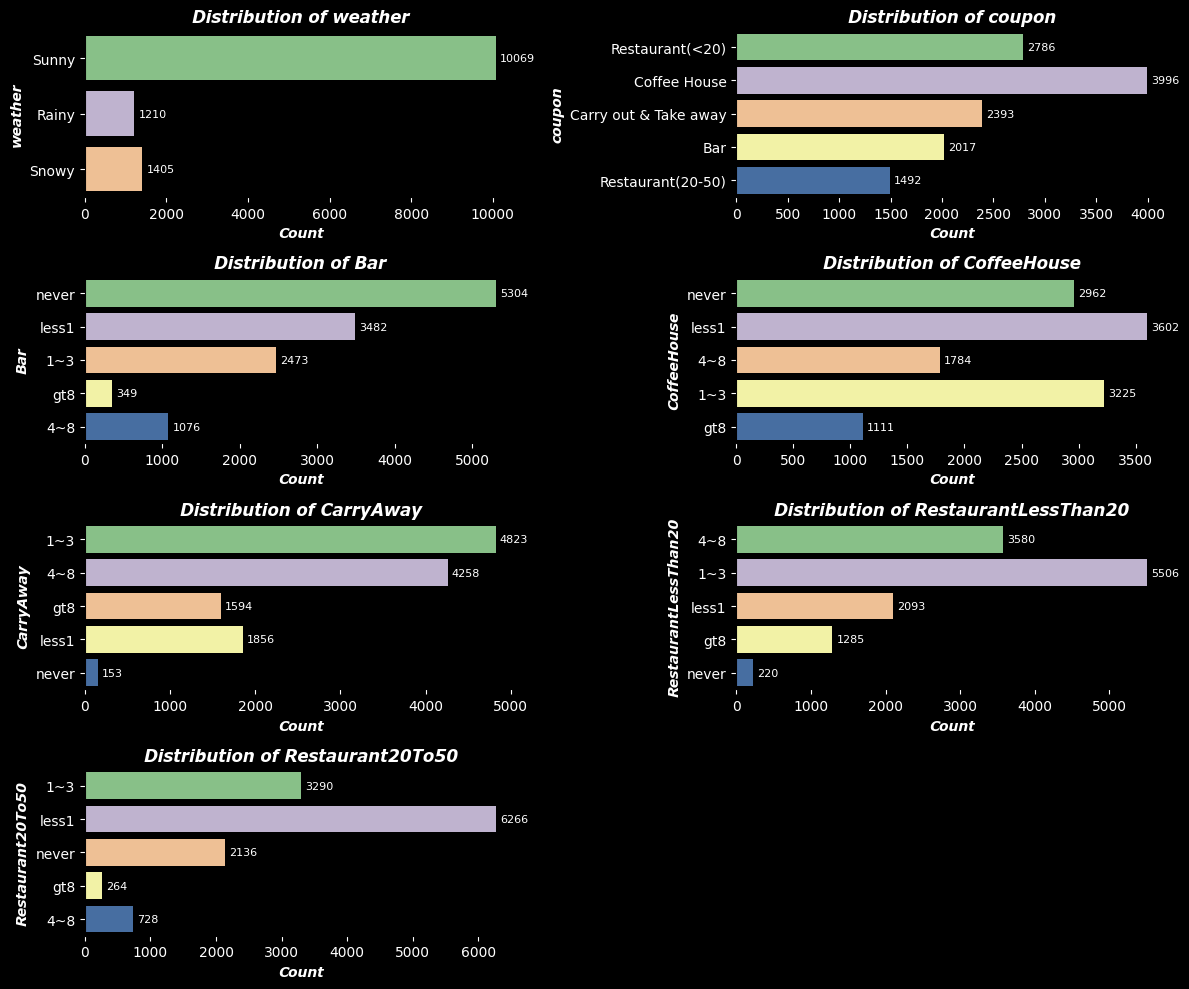

In [57]:
fig,ax = plt.subplots(4,2,figsize=(12,10))
ax = ax.flatten()
fig.patch.set_facecolor('black')
for i,col in enumerate(other_info):
    sns.countplot(data=df,y=col,ax=ax[i],hue=col,palette="Accent")
    ax[i].set_title(f"Distribution of {col}",color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_ylabel(col,color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_xlabel("Count",color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].tick_params(colors='white')
    ax[i].set_facecolor('black')
    ax[i].tick_params(axis='x')
    ax[i].legend([], [], frameon=False)
    ax[i].set_facecolor('black')
    for j in ax[i].containers:
        ax[i].bar_label(j,fmt='%d',label_type='edge',color='white',fontsize=8,padding=3)

if len(other_info) < len(ax):
    fig.delaxes(ax[len(other_info)])
plt.tight_layout()
plt.show()

In [58]:
non_categorical_feature

['occupation']

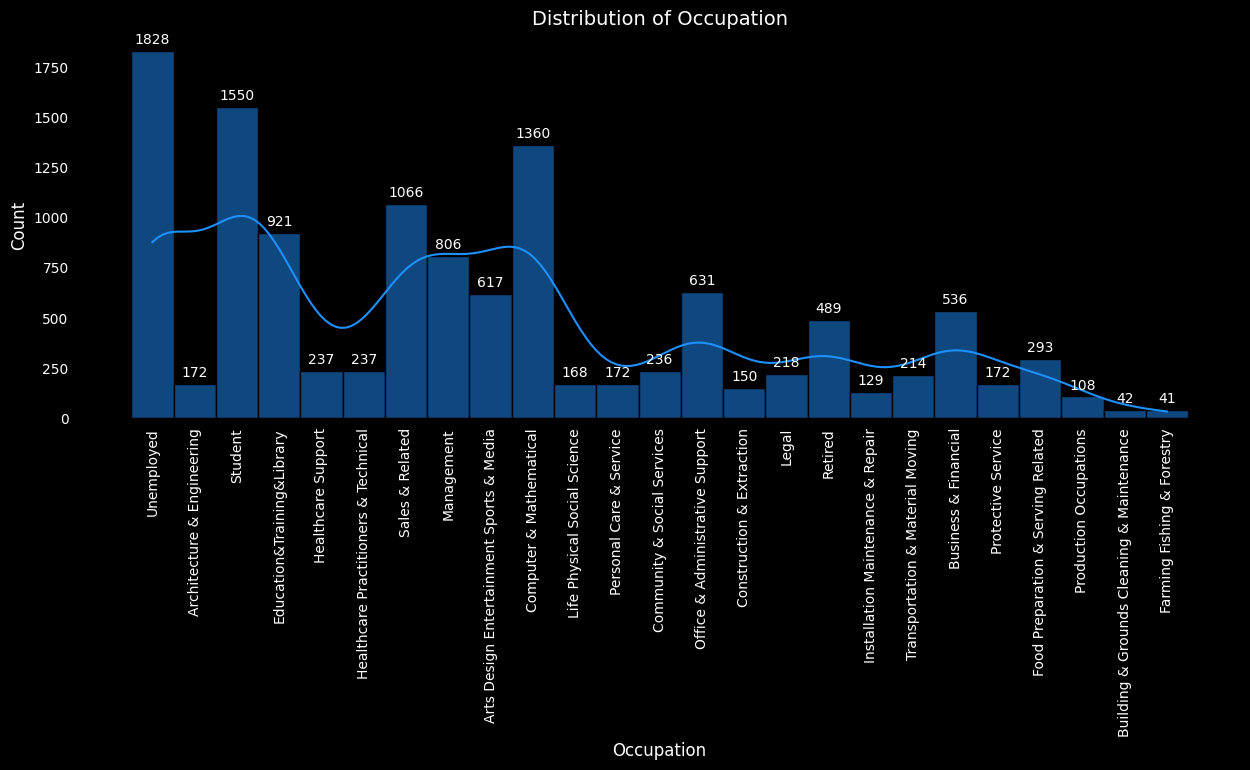

In [59]:

fig = plt.figure(figsize=(15,5))
fig.patch.set_facecolor('black')
ax = plt.gca()  # Get current axes
ax.set_facecolor('black')
hist = sns.histplot(df_copy1['occupation'], bins=30, kde=True, color="dodgerblue")
plt.title("Distribution of Occupation", fontsize=14, color='white')
plt.xlabel("Occupation", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', color='white', fontsize=10, padding=3)
plt.show()



In [60]:
discrete_features

['temperature',
 'expiration',
 'age',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Accept(Y/N?)']

In [61]:
discrete_summary = df_copy1[discrete_features].groupby('Accept(Y/N?)')

In [62]:
discrete_features.remove('Accept(Y/N?)')

In [63]:
for i in discrete_features:
    print(i)
    print(discrete_summary.describe()[i])
    print()
    print()

temperature
               count       mean        std   min   25%   50%   75%   max
Accept(Y/N?)                                                            
0             5381.0  61.857461  19.290191  30.0  55.0  55.0  80.0  80.0
1             7012.0  64.323303  18.840342  30.0  55.0  80.0  80.0  80.0


expiration
               count       mean        std  min  25%   50%   75%   max
Accept(Y/N?)                                                          
0             5381.0  12.715852  10.997351  2.0  2.0   2.0  24.0  24.0
1             7012.0  15.544495  10.702424  2.0  2.0  24.0  24.0  24.0


age
               count       mean        std   min   25%   50%   75%   max
Accept(Y/N?)                                                            
0             5381.0  33.707675  11.799307  18.0  26.0  31.0  41.0  55.0
1             7012.0  32.331717  11.405159  18.0  21.0  31.0  41.0  55.0


has_children
               count      mean       std  min  25%  50%  75%  max
Accept(Y/N?)        

##### <span style="font-family: 'Verdana';">Visualization of Bivariate Analysis of Discrete Features with Target Feature</span>

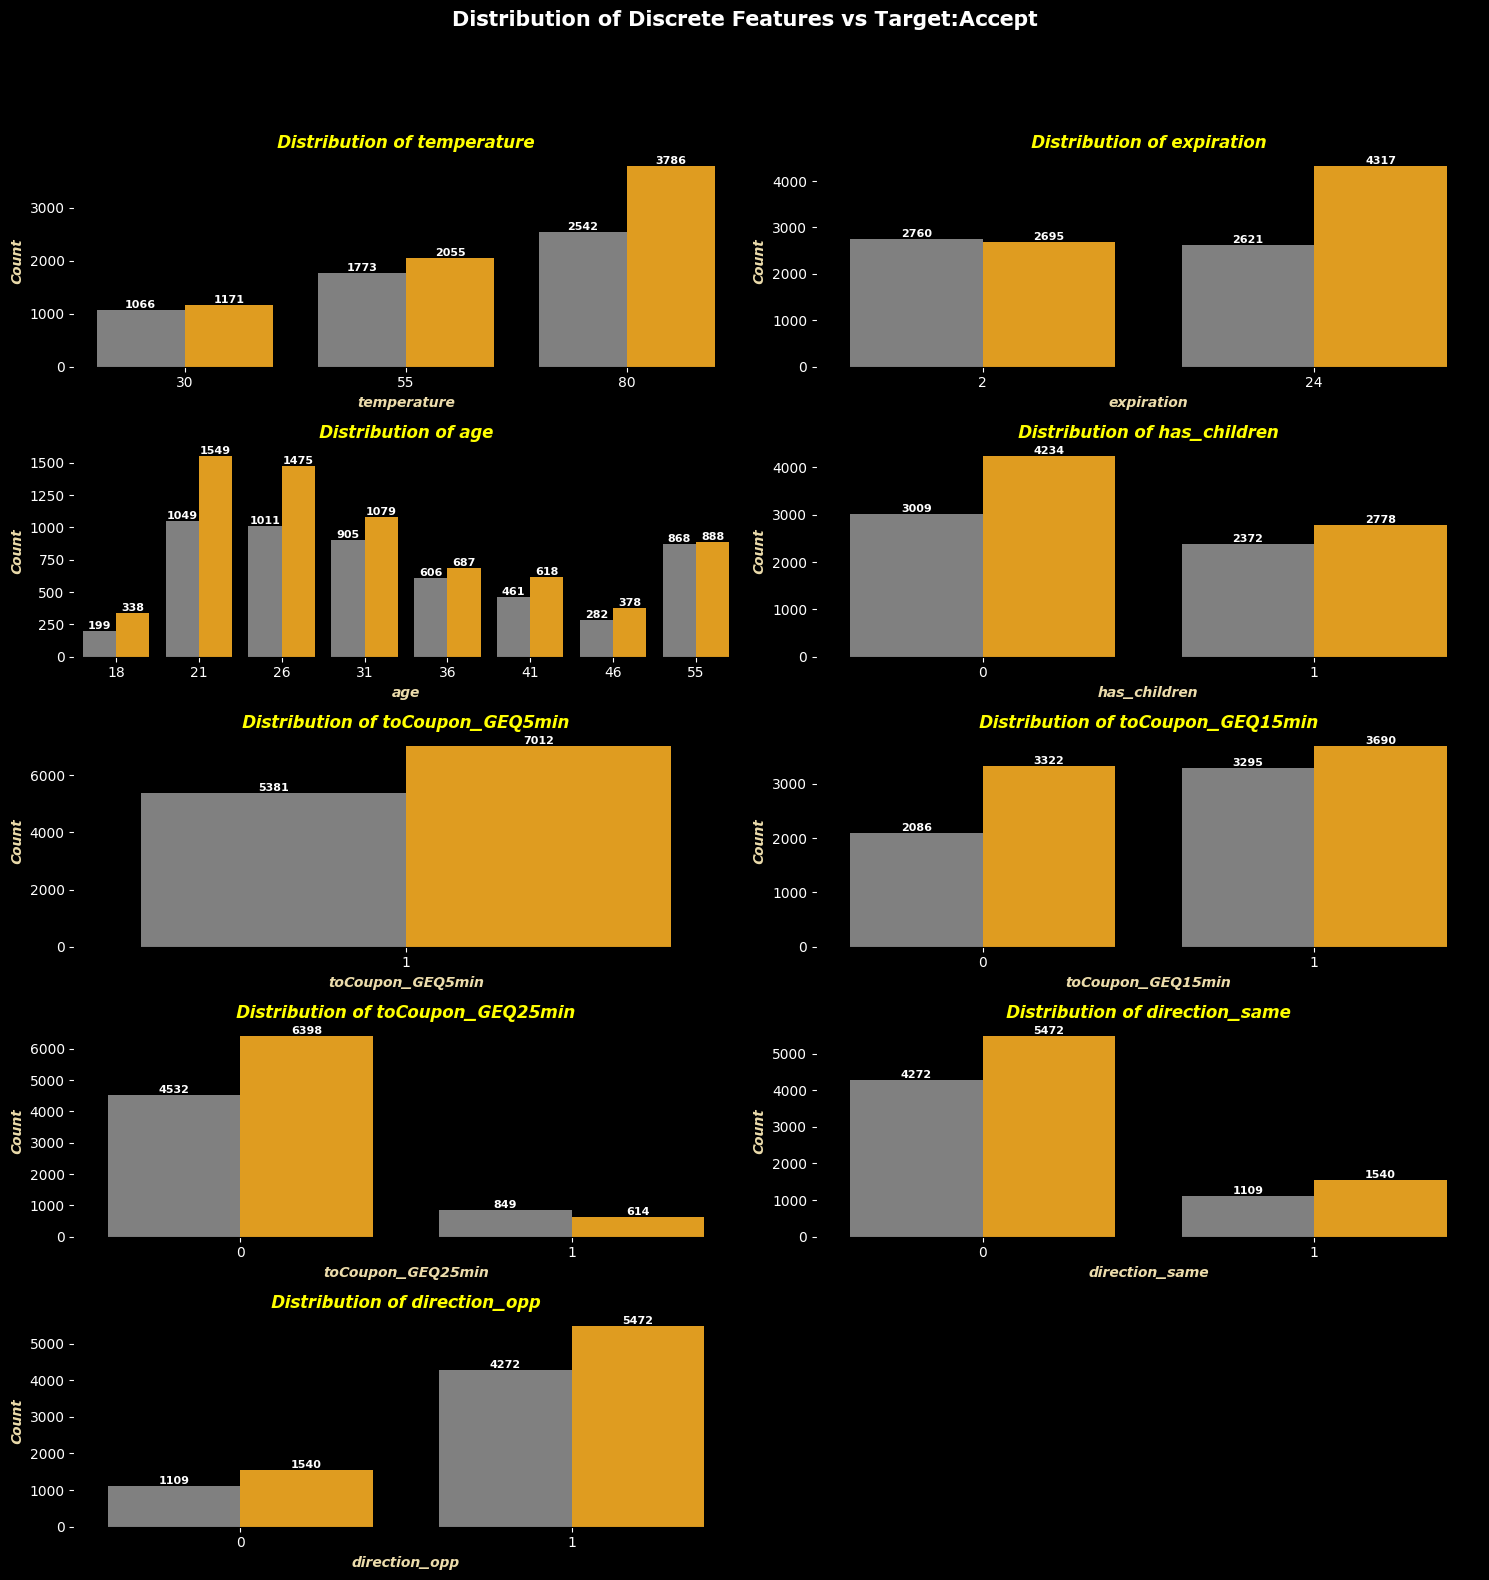

In [65]:
fig,ax = plt.subplots(5,2,figsize=(15,15))
ax = ax.flatten()
fig.patch.set_facecolor('black')
fig.suptitle('Distribution of Discrete Features vs Target:Accept', 
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(discrete_features):
    row = i // 2
    col_idx = i % 2
    sns.countplot(data=df_copy1,x=col,ax=ax[i],hue='Accept(Y/N?)',palette={0:'gray',1:'orange'})
    ax[i].set_title(f"Distribution of {col}",color='yellow',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_xlabel(col,color='#ECDCAB',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_ylabel("Count",color='#ECDCAB',fontname='Verdana',weight='bold',style='italic')
    ax[i].tick_params(colors='white')
    ax[i].set_facecolor('black')
    ax[i].legend([], [], frameon=False)
    for j in ax[i].containers:
        ax[i].bar_label(j,fmt='%d',label_type='edge',color='white',fontsize=8,weight='bold')
if len(discrete_features) < len(ax):
    fig.delaxes(ax[len(discrete_features)])
plt.tight_layout()
plt.show()

In [66]:
categorical_feature

['destination',
 'passanger',
 'weather',
 'coupon',
 'gender',
 'maritalStatus',
 'education',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [67]:
categorical_summary = df_copy1[categorical_feature+['Accept(Y/N?)']].groupby('Accept(Y/N?)')
for i in categorical_feature:
    print(i)
    print(categorical_summary.describe()[i])
    print()

destination
             count unique              top  freq
Accept(Y/N?)                                    
0             5381      3  No Urgent Place  2253
1             7012      3  No Urgent Place  3865

passanger
             count unique    top  freq
Accept(Y/N?)                          
0             5381      4  Alone  3418
1             7012      4  Alone  3760

weather
             count unique    top  freq
Accept(Y/N?)                          
0             5381      3  Sunny  4012
1             7012      3  Sunny  5850

coupon
             count unique           top  freq
Accept(Y/N?)                                 
0             5381      5  Coffee House  1970
1             7012      5  Coffee House  1943

gender
             count unique     top  freq
Accept(Y/N?)                           
0             5381      2  Female  2895
1             7012      2    Male  3552

maritalStatus
             count unique              top  freq
Accept(Y/N?)                        

##### <span style="font-family: 'Verdana';">Visualization of Bivariate Analysis of Categorical Features with Target Feature</span>

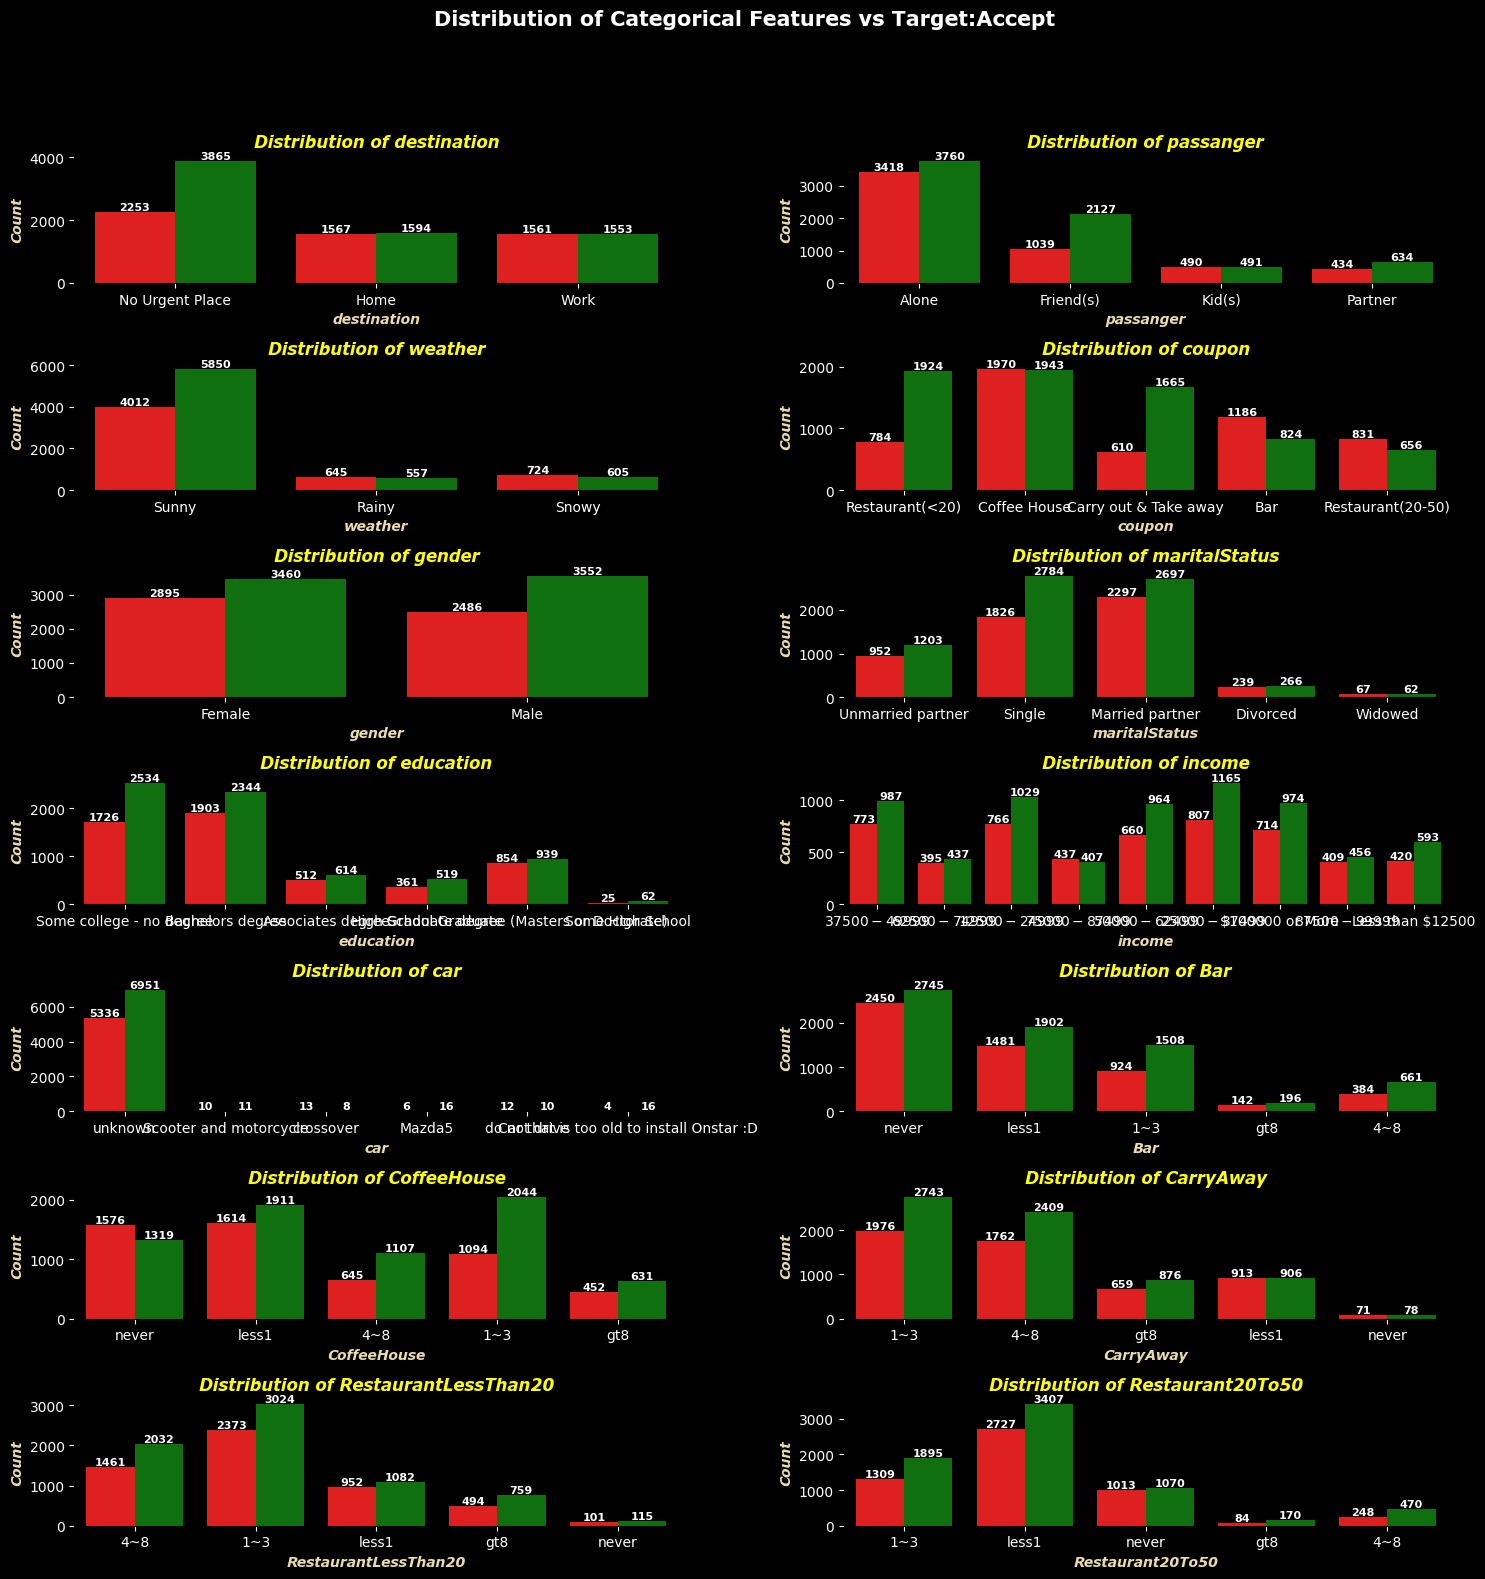

In [69]:
fig,ax = plt.subplots(7,2,figsize=(15,15))
ax = ax.flatten()
fig.patch.set_facecolor('black')
fig.suptitle('Distribution of Categorical Features vs Target:Accept', 
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(categorical_feature):
    sns.countplot(data=df_copy1,x=col,ax=ax[i],hue='Accept(Y/N?)',palette={0:'red',1:'green'})
    ax[i].set_title(f"Distribution of {col}",color='yellow',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_xlabel(col,color='#ECDCAB',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_ylabel("Count",color='#ECDCAB',fontname='Verdana',weight='bold',style='italic')
    ax[i].tick_params(colors='white')
    ax[i].set_facecolor('black')
    ax[i].legend([], [], frameon=False)
    for j in ax[i].containers:
        ax[i].bar_label(j,fmt='%d',label_type='edge',color='white',fontsize=8,weight='bold')
if len(categorical_feature) < len(ax):
    fig.delaxes(ax[len(categorical_feature)])
plt.tight_layout()
plt.show()

In [70]:
categorical_feature

['destination',
 'passanger',
 'weather',
 'coupon',
 'gender',
 'maritalStatus',
 'education',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [71]:
df_copy1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

##### <span style="font-family: 'Verdana';">Encoding Categorical Features</span>

In [73]:
df_copy2 = df_copy1.copy()

###### <span style="font-family: 'Verdana';">Ordinal Encoding</span>

In [75]:
# Define category order for 'Bar'
categories = [['never', 'less1', '1~3', '4~8', 'gt8']]

# Initialize OrdinalEncoder for a single column
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Apply transformation to the 'Bar' column
df_copy2['Bar'] = encoder.fit_transform(df_copy2[['Bar']])

# Check if any null values exist after encoding
print(df_copy2['Bar'].isnull().sum(), "missing values after encoding")
print(df_copy2[['Bar']].head())  # Display first few rows


0 missing values after encoding
   Bar
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


In [76]:
# Define category order for 'Bar'
categories = [['never','less1','4~8','1~3','gt8']]

# Initialize OrdinalEncoder for a single column
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Apply transformation to the 'Bar' column
df_copy2['CoffeeHouse'] = encoder.fit_transform(df_copy2[['CoffeeHouse']])

# Check if any null values exist after encoding
print(df_copy2['CoffeeHouse'].isnull().sum(), "missing values after encoding")
print(df_copy2[['CoffeeHouse']].head())  # Display first few rows

0 missing values after encoding
   CoffeeHouse
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0


In [77]:
# Define category order for 'Bar'
categories = [['1~3','4~8','gt8','less1','never']]

# Initialize OrdinalEncoder for a single column
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Apply transformation to the 'Bar' column
df_copy2['CarryAway'] = encoder.fit_transform(df_copy2[['CarryAway']])

# Check if any null values exist after encoding
print(df_copy2['CarryAway'].isnull().sum(), "missing values after encoding")
print(df_copy2[['CarryAway']].head())  # Display first few rows

0 missing values after encoding
   CarryAway
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0


In [78]:
# Define category order for 'Bar'
categories = [['4~8','1~3','less1','gt8','never']]

# Initialize OrdinalEncoder for a single column
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Apply transformation to the 'Bar' column
df_copy2['RestaurantLessThan20'] = encoder.fit_transform(df_copy2[['RestaurantLessThan20']])

# Check if any null values exist after encoding
print(df_copy2['RestaurantLessThan20'].isnull().sum(), "missing values after encoding")
print(df_copy2[['RestaurantLessThan20']].head())  # Display first few rows

0 missing values after encoding
   RestaurantLessThan20
0                   0.0
1                   0.0
2                   0.0
3                   0.0
4                   0.0


In [79]:
# Define category order for 'Bar'
categories = [['1~3','less1','never','gt8','4~8']]

# Initialize OrdinalEncoder for a single column
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Apply transformation to the 'Bar' column
df_copy2['Restaurant20To50'] = encoder.fit_transform(df_copy2[['Restaurant20To50']])

# Check if any null values exist after encoding
print(df_copy2['Restaurant20To50'].isnull().sum(), "missing values after encoding")
print(df_copy2[['Restaurant20To50']].head())  # Display first few rows

0 missing values after encoding
   Restaurant20To50
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0


###### <span style="font-family: 'Verdana';">Onehot Encoding</span>

In [81]:
categorical_cols = df_copy2.select_dtypes(include=['object']).columns
categorical_cols

Index(['destination', 'passanger', 'weather', 'coupon', 'gender',
       'maritalStatus', 'education', 'occupation', 'income', 'car'],
      dtype='object')

In [82]:
df_hot_encoded = pd.get_dummies(df_copy2, columns=['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus'], drop_first=True)

In [83]:
dummy_columns = df_hot_encoded.columns[df_hot_encoded.columns.str.startswith(('destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus'))]

df_hot_encoded[dummy_columns] = df_hot_encoded[dummy_columns].astype(int)

In [84]:
df_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature                      12393 non-null  int64  
 1   expiration                       12393 non-null  int64  
 2   age                              12393 non-null  int64  
 3   has_children                     12393 non-null  int64  
 4   education                        12393 non-null  object 
 5   occupation                       12393 non-null  object 
 6   income                           12393 non-null  object 
 7   car                              12393 non-null  object 
 8   Bar                              12393 non-null  float64
 9   CoffeeHouse                      12393 non-null  float64
 10  CarryAway                        12393 non-null  float64
 11  RestaurantLessThan20             12393 non-null  float64
 12  Restaurant20To50       

###### <span style="font-family: 'Verdana';">Label Encoding</span>

In [86]:
label_encoder = LabelEncoder()
df_hot_encoded['income'] = label_encoder.fit_transform(df_hot_encoded['income'])
df_hot_encoded['car'] = label_encoder.fit_transform(df_hot_encoded['car'])

In [87]:
df_hot_encoded['education'] = label_encoder.fit_transform(df_hot_encoded['education'])

###### <span style="font-family: 'Verdana';">Frequency Encoding</span>

In [89]:
# Frequency encoding for 'occupation'
occupation_freq = df_hot_encoded['occupation'].value_counts() / len(df_hot_encoded)
df_hot_encoded['occupation_encoded'] = df_hot_encoded['occupation'].map(occupation_freq)
#Handles High Cardinality
# If occupation has many unique categories (e.g., "Engineer", "Doctor", "Teacher", etc.), one-hot encoding would create too many columns, making the dataset sparse.
#Frequency encoding replaces each category with its occurrence count, reducing dimensionality.
#Preserves Information
#Works Well with Tree-Based Models

In [90]:
df_hot_encoded=df_hot_encoded.drop(columns=['occupation'])

In [91]:
df_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature                      12393 non-null  int64  
 1   expiration                       12393 non-null  int64  
 2   age                              12393 non-null  int64  
 3   has_children                     12393 non-null  int64  
 4   education                        12393 non-null  int32  
 5   income                           12393 non-null  int32  
 6   car                              12393 non-null  int32  
 7   Bar                              12393 non-null  float64
 8   CoffeeHouse                      12393 non-null  float64
 9   CarryAway                        12393 non-null  float64
 10  RestaurantLessThan20             12393 non-null  float64
 11  Restaurant20To50                 12393 non-null  float64
 12  toCoupon_GEQ5min       

##### <span style="font-family: 'Verdana';">Handling Correlation </span>

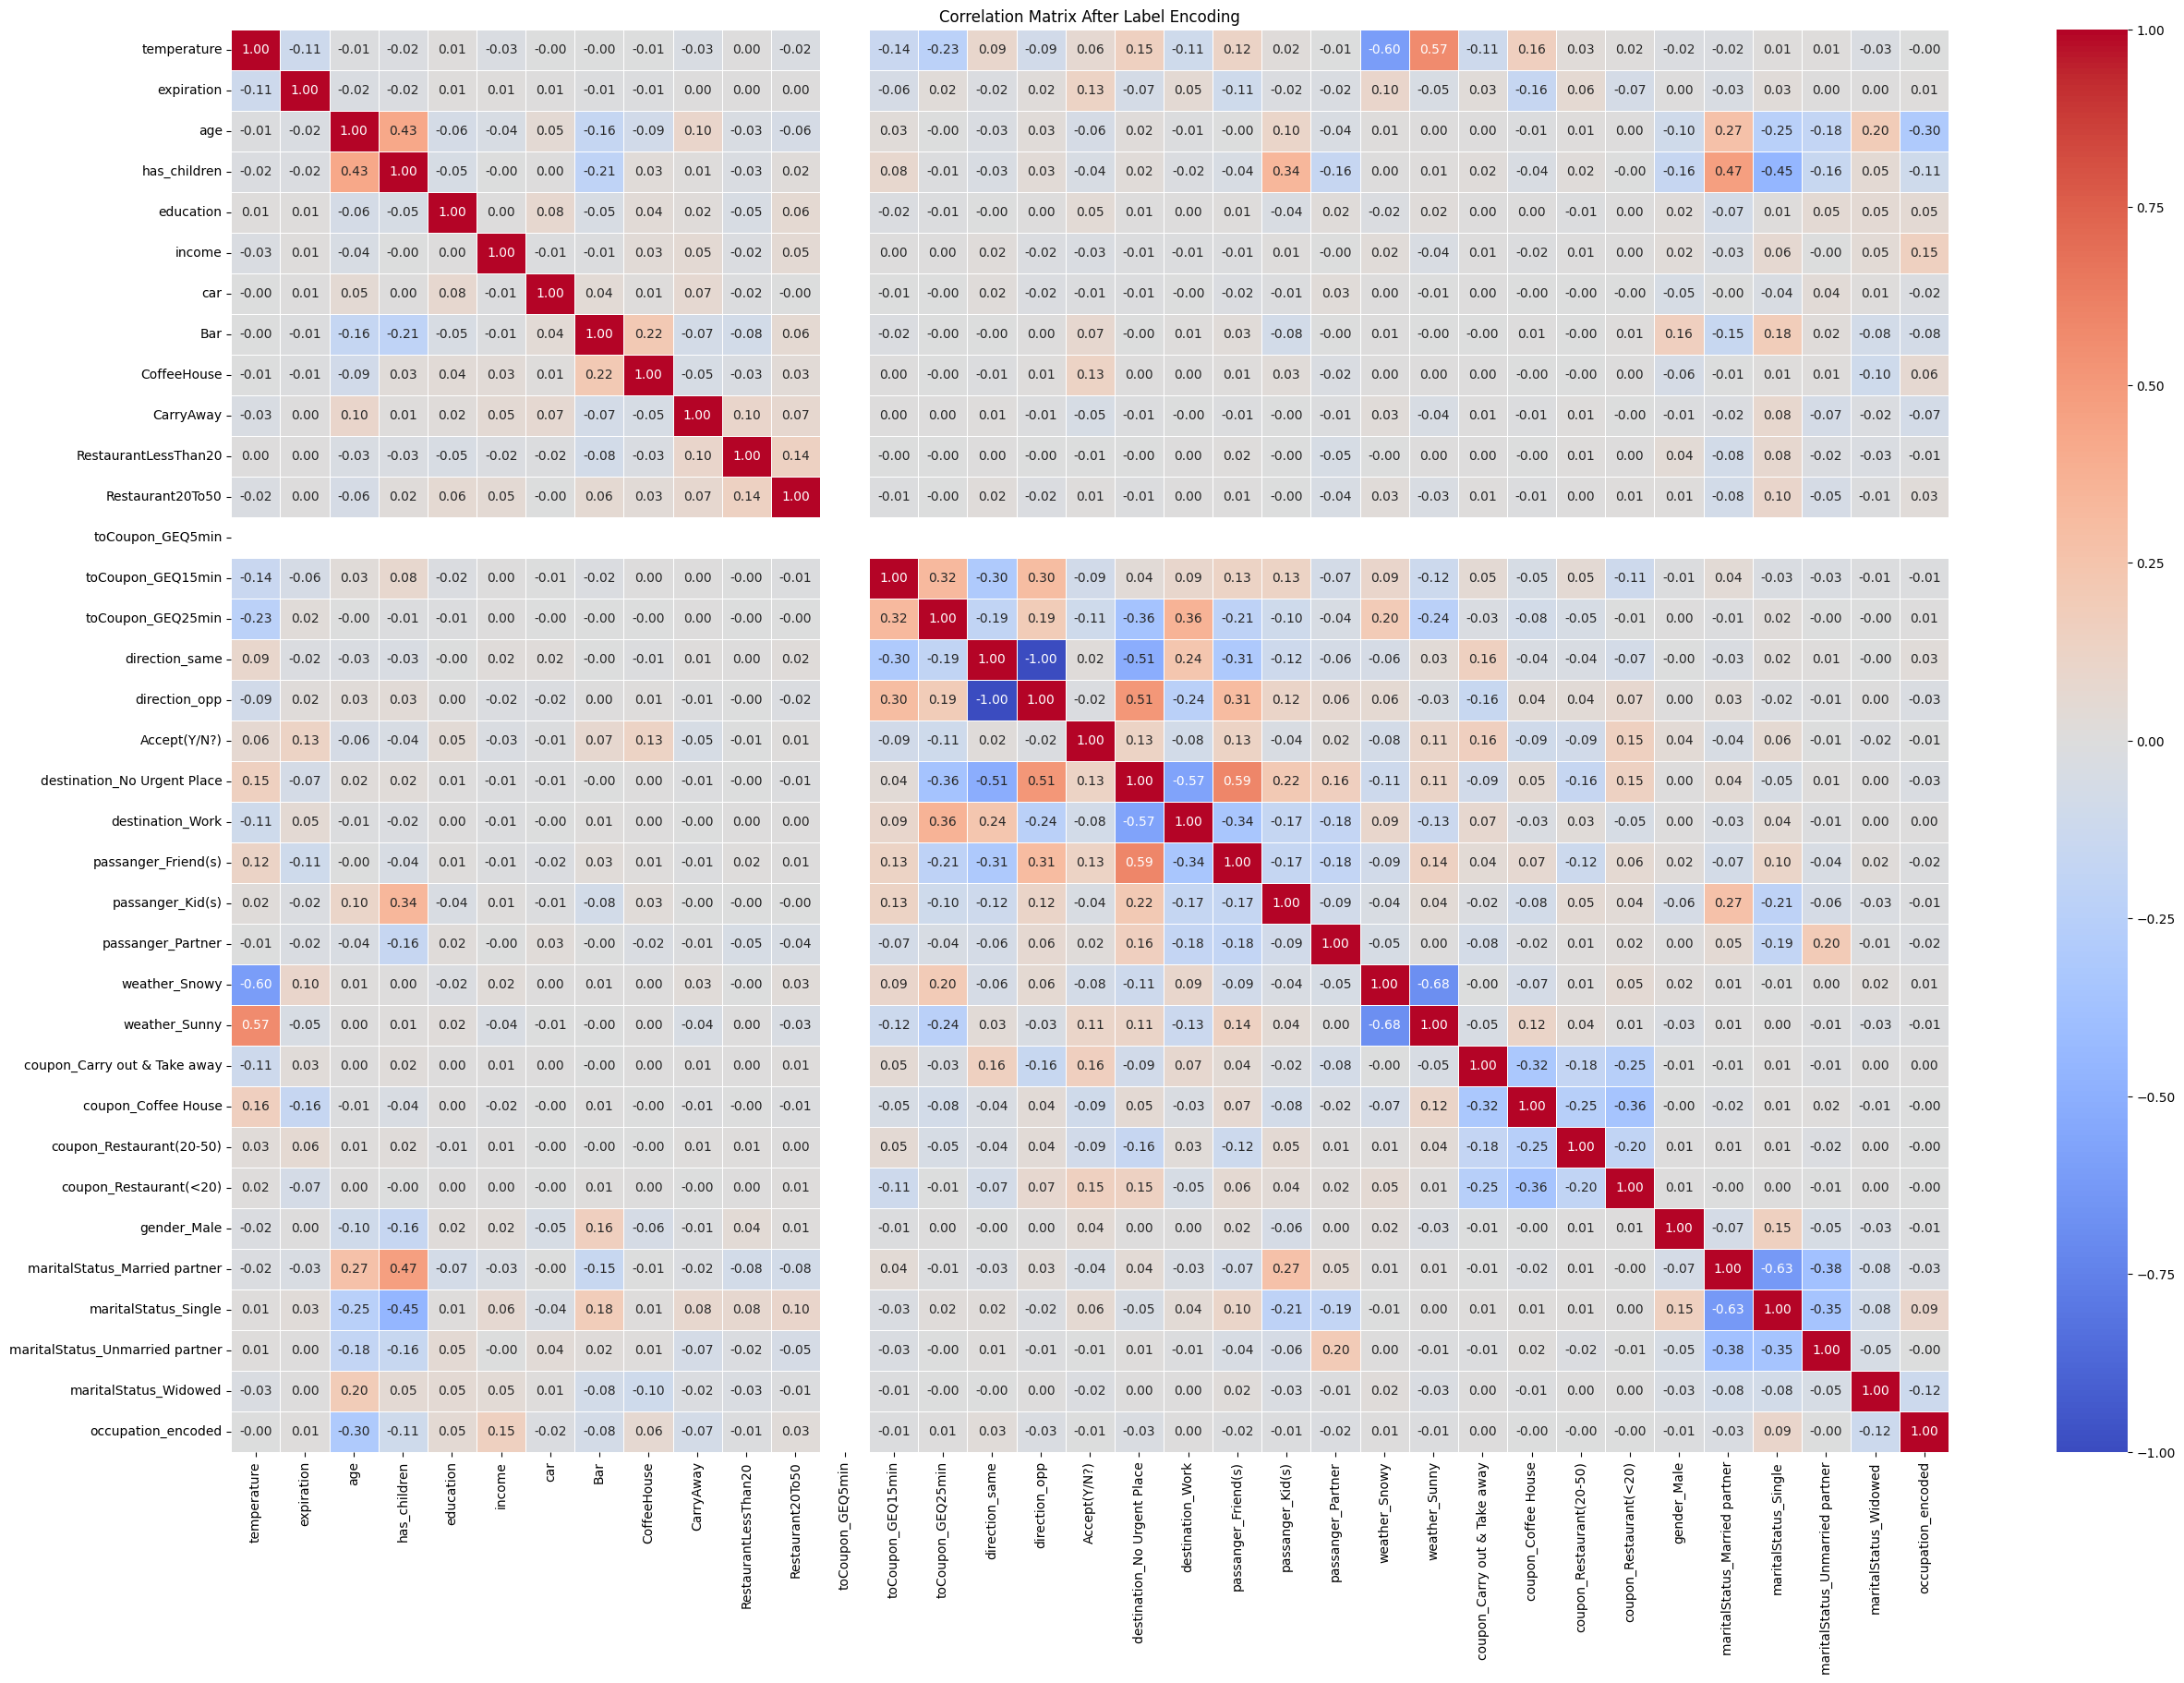

In [93]:
corr = df_hot_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix After Label Encoding")
plt.show()

##### <span style="font-family: 'Verdana';">Handling unwanted feature </span>

In [95]:
df_hot_encoded['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12393
Name: count, dtype: int64

Since toCoupon_GEQ5min has only a single value (1) for all records, 
it does not provide any meaningful distinction between users who accepted or rejected the coupon. 
The 50-50 split in the target variable simply reflects the overall distribution and not any influence from this feature.

In [97]:
df_hot_encoded.drop(columns=['toCoupon_GEQ5min'],inplace=True)

In [98]:
df_hot_encoded.columns

Index(['temperature', 'expiration', 'age', 'has_children', 'education',
       'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)',
       'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'gender_Male',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'occupation_encoded'],
      dtype='object')

In [99]:
df_hot_encoded.shape

(12393, 34)

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Feature Engineering and Preprocessing</center>
</div>

##### <span style="font-family: 'Verdana';">Spliting and Transformation</span>

In [102]:
x = df_hot_encoded.drop(columns=['Accept(Y/N?)'])
y = df_hot_encoded['Accept(Y/N?)']

In [103]:
x.head()

temperature  expiration  age  has_children  education  income  car  Bar  \
0           55          24   21             1          5       3    5  0.0   
1           80           2   21             1          5       3    5  0.0   
2           80           2   21             1          5       3    5  0.0   
3           80           2   21             1          5       3    5  0.0   
4           80          24   21             1          5       3    5  0.0   

   CoffeeHouse  CarryAway  ...  coupon_Carry out & Take away  \
0          0.0        0.0  ...                             0   
1          0.0        0.0  ...                             0   
2          0.0        0.0  ...                             1   
3          0.0        0.0  ...                             0   
4          0.0        0.0  ...                             0   

   coupon_Coffee House  coupon_Restaurant(20-50)  coupon_Restaurant(<20)  \
0                    0                         0                       1   
1                    1                         0                       0   
2                    0                         0                       0   
3                    1                         0                       0   
4                    1                         0                       0   

   gender_Male  maritalStatus_Married partner  maritalStatus_Single  \
0            0                              0                     0   
1            0                              0                     0   
2            0                              0                     0   
3            0                              0                     0   
4            0                              0                     0   

   maritalStatus_Unmarried partner  maritalStatus_Widowed  occupation_encoded  
0                                1                      0            0.147503  
1                                1                      0            0.147503  
2                                1                      0            0.147503  
3                                1                      0            0.147503  
4                                1                      0            0.147503  

[5 rows x 33 columns]

In [104]:
y.value_counts()

Accept(Y/N?)
1    7012
0    5381
Name: count, dtype: int64

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
smote = SMOTE(random_state=12)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [107]:
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Model Selection and Training</center>
</div>

##### <span style="font-family: 'Verdana';">LogisticRegression</span>

In [110]:
logist_model = LogisticRegression(class_weight='balanced', random_state=12)
logist_model.fit(x_train_resampled_scaled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=12)

In [111]:
y_train_pred = logist_model.predict(x_train_resampled_scaled)
print(classification_report(y_train_resampled,y_train_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      5643
           1       0.71      0.72      0.71      5643

    accuracy                           0.71     11286
   macro avg       0.71      0.71      0.71     11286
weighted avg       0.71      0.71      0.71     11286



In [112]:
y_test_pred = logist_model.predict(x_test_scaled)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1110
           1       0.70      0.72      0.71      1369

    accuracy                           0.68      2479
   macro avg       0.67      0.67      0.67      2479
weighted avg       0.67      0.68      0.67      2479



In [113]:
logistic_cm = confusion_matrix(y_test,y_test_pred)
logistic_cm

array([[684, 426],
       [378, 991]], dtype=int64)

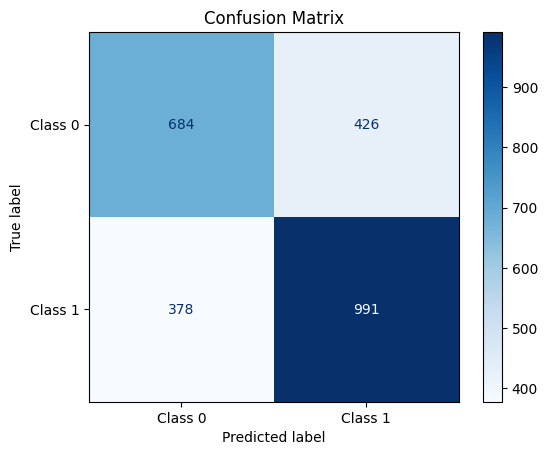

In [114]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=logistic_cm, display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

##### <span style="font-family: 'Verdana';">DecisionTree</span>

In [116]:
dt_model = DecisionTreeClassifier(class_weight='balanced',random_state=33)
dt_model.fit(x_train_resampled_scaled,y_train_resampled)

DecisionTreeClassifier(class_weight='balanced', random_state=33)

In [117]:
dt_y_train_pred = dt_model.predict(x_train_resampled_scaled)
print(classification_report(y_train_resampled,dt_y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5643
           1       1.00      0.99      0.99      5643

    accuracy                           0.99     11286
   macro avg       0.99      0.99      0.99     11286
weighted avg       0.99      0.99      0.99     11286



In [118]:
dt_y_test_pred = dt_model.predict(x_test_scaled)
print(classification_report(y_test,dt_y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60      1110
           1       0.68      0.69      0.68      1369

    accuracy                           0.65      2479
   macro avg       0.64      0.64      0.64      2479
weighted avg       0.65      0.65      0.65      2479



In [119]:
dt_cm = confusion_matrix(y_test,dt_y_test_pred)
dt_cm

array([[665, 445],
       [427, 942]], dtype=int64)

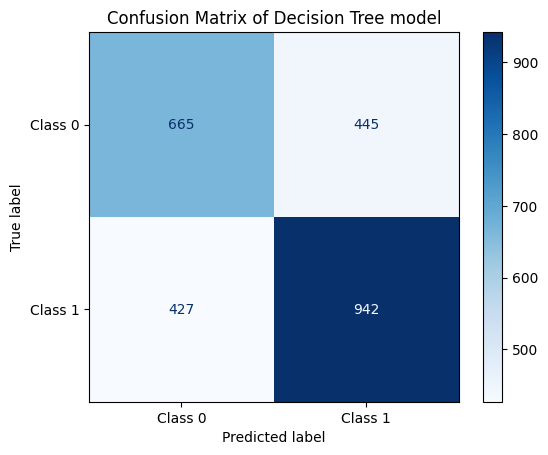

In [120]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Decision Tree model')
plt.show()

##### <span style="font-family: 'Verdana';">AdaBoostClassifier</span>

In [122]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train_resampled_scaled,y_train_resampled)

AdaBoostClassifier()

In [123]:
ada_y_train_pred = ada_model.predict(x_train_resampled_scaled)
print(classification_report(y_train_resampled,ada_y_train_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5643
           1       0.71      0.71      0.71      5643

    accuracy                           0.71     11286
   macro avg       0.71      0.71      0.71     11286
weighted avg       0.71      0.71      0.71     11286



In [124]:
ada_y_test_pred = ada_model.predict(x_test_scaled)
print(classification_report(y_test,ada_y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1110
           1       0.70      0.72      0.71      1369

    accuracy                           0.67      2479
   macro avg       0.67      0.67      0.67      2479
weighted avg       0.67      0.67      0.67      2479



In [125]:
ada_cm  =confusion_matrix(y_test,ada_y_test_pred)
ada_cm

array([[684, 426],
       [388, 981]], dtype=int64)

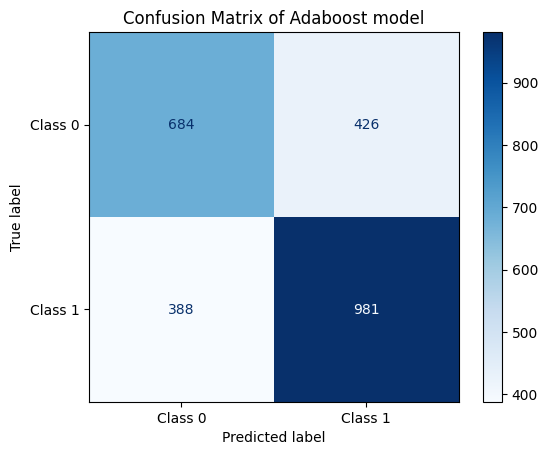

In [126]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=ada_cm, display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Adaboost model')
plt.show()

##### <span style="font-family: 'Verdana';">RandomForest</span>

In [128]:
rt_model = RandomForestClassifier(class_weight='balanced')
rt_model.fit(x_train_resampled_scaled,y_train_resampled)

RandomForestClassifier(class_weight='balanced')

In [129]:
rt_y_train_pred = rt_model.predict(x_train_resampled_scaled)
print(classification_report(y_train_resampled,rt_y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5643
           1       0.99      0.99      0.99      5643

    accuracy                           0.99     11286
   macro avg       0.99      0.99      0.99     11286
weighted avg       0.99      0.99      0.99     11286



In [130]:
rt_y_test_pred = rt_model.predict(x_test_scaled)
print(classification_report(y_test,rt_y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69      1110
           1       0.74      0.79      0.76      1369

    accuracy                           0.73      2479
   macro avg       0.73      0.72      0.73      2479
weighted avg       0.73      0.73      0.73      2479



##### <span style="font-family: 'Verdana';">XGB Classifier</span>

In [132]:
xg_model = xgb.XGBClassifier()
xg_model.fit(x_train_resampled_scaled,y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [133]:
xg_y_train_pred = xg_model.predict(x_train_resampled_scaled)
print(classification_report(y_train_resampled,xg_y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      5643
           1       0.91      0.93      0.92      5643

    accuracy                           0.92     11286
   macro avg       0.92      0.92      0.92     11286
weighted avg       0.92      0.92      0.92     11286



In [134]:
xg_y_test_pred = xg_model.predict(x_test_scaled)
print(classification_report(y_test,xg_y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1110
           1       0.76      0.79      0.78      1369

    accuracy                           0.75      2479
   macro avg       0.74      0.74      0.74      2479
weighted avg       0.75      0.75      0.75      2479



##### <span style="font-family: 'Verdana';">Features Importance in XGB</span>

In [136]:
dt_feature_importance_xgb = pd.DataFrame({
    'Feature': x.columns,
    'Importance': xg_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(dt_feature_importance_xgb)

                            Feature  Importance
26           coupon_Restaurant(<20)    0.108258
23     coupon_Carry out & Take away    0.085692
15                    direction_opp    0.064907
13                toCoupon_GEQ25min    0.050391
14                   direction_same    0.044897
16      destination_No Urgent Place    0.044859
24              coupon_Coffee House    0.042202
1                        expiration    0.039692
8                       CoffeeHouse    0.033204
25         coupon_Restaurant(20-50)    0.031861
18              passanger_Friend(s)    0.029467
7                               Bar    0.026787
20                passanger_Partner    0.025752
29             maritalStatus_Single    0.025372
27                      gender_Male    0.024734
11                 Restaurant20To50    0.024447
22                    weather_Sunny    0.024085
10             RestaurantLessThan20    0.021520
30  maritalStatus_Unmarried partner    0.020952
9                         CarryAway    0

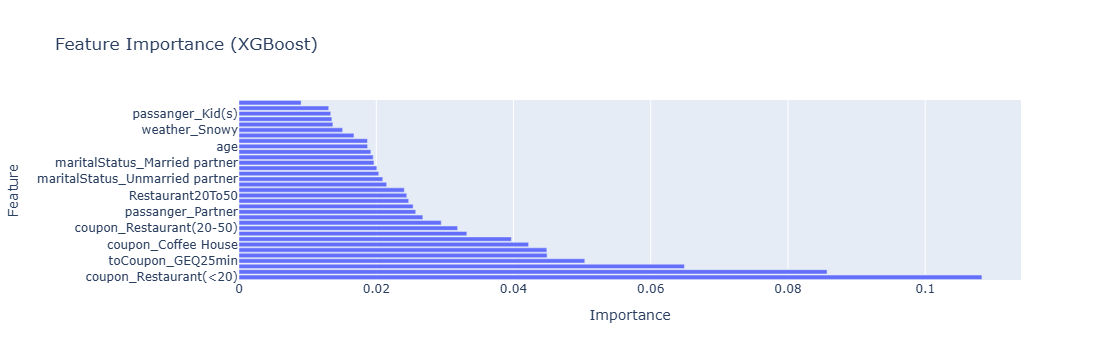

In [137]:
fig = px.bar(
    dt_feature_importance_xgb,
    x='Importance',
    y='Feature',
    title='Feature Importance (XGBoost)', 
    labels={'Importance': 'Importance', 'Feature': 'Feature'} 
)
fig.show()

##### Hyperparameter turning in Logistic Regression

In [139]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1','l2','elasticnet'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear','saga']  # 'liblinear' supports L1 & L2
}

In [140]:
t_lg_model = LogisticRegression(class_weight='balanced',max_iter=1000)
grid_search = GridSearchCV(t_lg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [141]:
best_lr_model = grid_search.best_estimator_
train_accuracy = best_lr_model.score(x_train_resampled_scaled,y_train_resampled)
print(f"Train Accuracy {train_accuracy}")
test_accuracy = best_lr_model.score(x_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Train Accuracy 0.7096402622718412
Test Accuracy: 0.6760790641387656


#### Hyper parameter turning in Desion tree

In [143]:
t_dt_model = DecisionTreeClassifier(class_weight='balanced',random_state=42)
param_grid = {
    'max_depth': [6],  # Control overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 5, 10],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Feature selection
    'criterion': ['gini', 'entropy']  # Split strategy
}
grid_search = GridSearchCV(t_dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [144]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [145]:
best_dt = grid_search.best_estimator_

# Evaluate the best model
train_accuracy = best_dt.score(x_train_resampled_scaled,y_train_resampled)
print(f"Train Accuracy {train_accuracy}")
test_accuracy = best_dt.score(x_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Train Accuracy 0.7238171185539607
Test Accuracy: 0.6829366680112948


#### Hyperparameter Turning on Adaboost

In [147]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of weak learners
    'learning_rate': [0.001, 0.01, 0.1, 1],  # Step size
}
t_adaboost = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(t_adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 1, 'n_estimators': 300}


In [148]:
best_ada = grid_search.best_estimator_

# Evaluate the best model
train_accuracy = best_ada.score(x_train_resampled_scaled,y_train_resampled)
print(f"Train Accuracy {train_accuracy}")
test_accuracy = best_ada.score(x_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Train Accuracy 0.7211589580010632
Test Accuracy: 0.6873739411052844


#### Hyperparameter Turning on RandomForest

In [150]:
t_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [200],  # Number of trees
    'max_depth': [5, 10],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples in a leaf
    'max_features': ['sqrt', 'log2']  # Feature selection
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(t_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [151]:
best_rf = grid_search.best_estimator_

# Evaluate on test data
test_accuracy = best_rf.score(x_test_scaled, y_test)
train_accuracy = best_rf.score(x_train_resampled_scaled,y_train_resampled)
print("Training accuracy",train_accuracy)
print("Test Accuracy:", test_accuracy)

Training accuracy 0.8298777246145668
Test Accuracy: 0.7123840258168617


<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Conclusion</center>
</div>

1. Overfitting vs. Generalization<br>
Decision Tree (before tuning) had 99% training accuracy but only 65% testing accuracy, indicating severe overfitting.<br>
Random Forest (before tuning) also showed overfitting (99% vs. 73%).<br>
<b>XGBoost performed best before tuning (92% vs. 75%), meaning it learned well compared to other models</b><br>

2. After tuning:<br>
Decision Tree improved significantly (72% vs. 68%), showing reduced overfitting.<br>
Random Forest became more balanced (82% vs. 71%), meaning it now generalizes better.<br>
AdaBoost and Logistic Regression had almost the same results before and after tuning.<br>

3. Best Performing Model<br>
Before tuning: XGBoost was the best model with 75% testing accuracy.<br>
After tuning: The Decision Tree, AdaBoost, and Random Forest models improved, but none surpassed XGBoost’s original performance.<br>
Tuned models are more balanced, but the best generalizing model remains XGBoost (75%), followed by Random Forest (73%) before tuning.<br>


<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Overall Insights</center>
</div>

<b> Conclusion</b><br>
Final Model Choice: XGBoost (75% test accuracy) is the best-performing model.<br>
Key Insights:<br>

XGBoost handled the data well, avoiding both overfitting and underfitting.<br>
The Decision Tree and Random Forest improved after tuning, but XGBoost was still better.<br>
AdaBoost and Logistic Regression remained stable but didn't outperform XGBoost.<br>

In [156]:
model_performace = {
    'model':['LogisticRegression','DecisionTree','Adaboost','RandomForest','XGB'],
    'training %':[.71,.99,.71,.99,.92],
    'testing %':[.68,.65,.67,.73,.75]
}
performace_df = pd.DataFrame(model_performace)
performace_df

model  training %  testing %
0  LogisticRegression        0.71       0.68
1        DecisionTree        0.99       0.65
2            Adaboost        0.71       0.67
3        RandomForest        0.99       0.73
4                 XGB        0.92       0.75

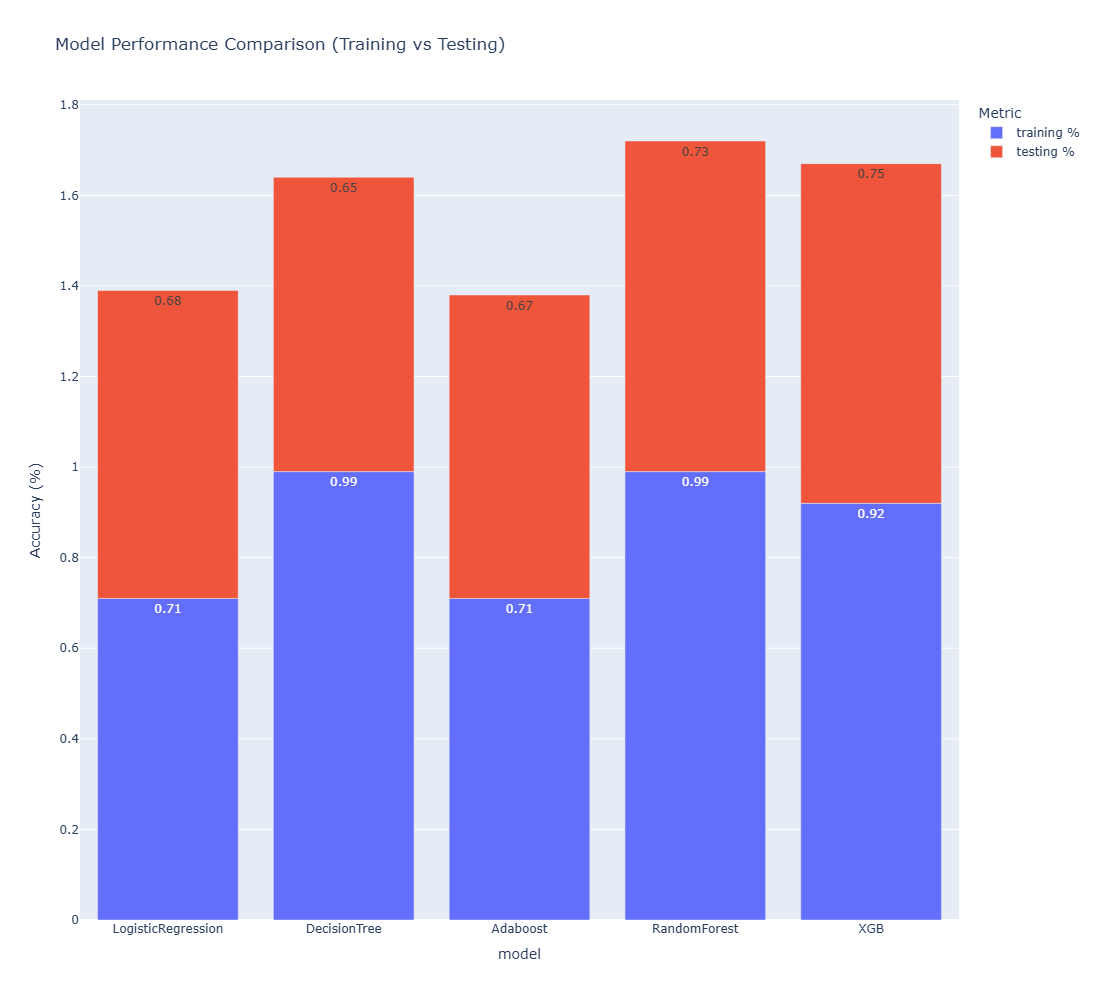

In [282]:
fig = px.bar(
    performace_df,
    x="model",
    y=["training %", "testing %"],
    title="Model Performance Comparison (Training vs Testing)",
    text_auto=True,
    labels={"value": "Accuracy (%)", "variable": "Metric"}
)
fig.update_layout(width=800,height=1000)
fig.show()

# <center>__________________________________________________________________________</center>